## Densidades de reliquia para el operador $O_{\phi_4}$

Se busca replicar comprobar los resultados de densidad de reliquia en el contexto de un modelo efectivo para un campo escalar de materia oscura descrite por Criado et Al. [http://arxiv.org/abs/2104.14443]. Se explora el coeficiente $C_{\phi_4}$ asociado al operador efectivo $O_{\phi_4}$ comparado con la masa del campo escalar:

$$
O_{\phi_4} = \left( \varphi^{\dagger} \varphi  \right) \left( \phi^{\dagger} \phi  \right)^2
$$

Con $\phi$ el doblete de Higgs. Los resultados de la exploración de micrOmegas se toman como parámetros de este notebook. El script de python utilizado para la generación de los puntos en el espacio de parámetros y su evaluación en micrOmegas se encuentra en esta misma carpeta.

In [1]:
# Librerías utilizadas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
mpl.rcParams.update(mpl.rcParamsDefault)

Buscamos los puntos en el espacio de parámetros para cada masa cuyo valor de densidad de reliquia se encuentra más cercano al valor de $\Omega h^2 = 0.1198 $ y que además se encuentren entre $0.11$ y $0.13$.

In [2]:
# Cargando el archivo CSV de la salida de micrOmegas
data = np.loadtxt('output.csv', delimiter=',')

# Filtrando los valores unicos para la masa del campo escalar
unique_values = np.unique(data[:, 0])

# Diccionario para almacenar los valores más cercanos para cada valor único de la masa
closest_values = {}

for value in unique_values:
    # Tomando las filas donde la masa coincide con el valor único 
    filtered_data = data[data[:, 0] == value]

   # Tomando el valor del coeficiente
    second_column = filtered_data[:, 1]

    # Tomando la densidad de reliquia
    last_column = filtered_data[:, -1]
    
    # Encontrando el valor del coeficiente que minimiza la diferencia de la densidad de reliquia con 0.1198
    closest_value = second_column[np.abs(last_column - 0.1198).argmin()]
    
    # Aplicanod la condición y almacenando en un diccionario
    if 0.11 < last_column[np.abs(last_column - 0.1198).argmin()] and last_column[np.abs(last_column - 0.1198).argmin()] < 0.13:
        closest_values[value] = closest_value

# Convirtiendo el diccionario en una lista
closest_values_list = [(key, value) for key, value in closest_values.items()]

# Convirtiendo la lista en un arreglo de numpy
line = np.array(closest_values_list)

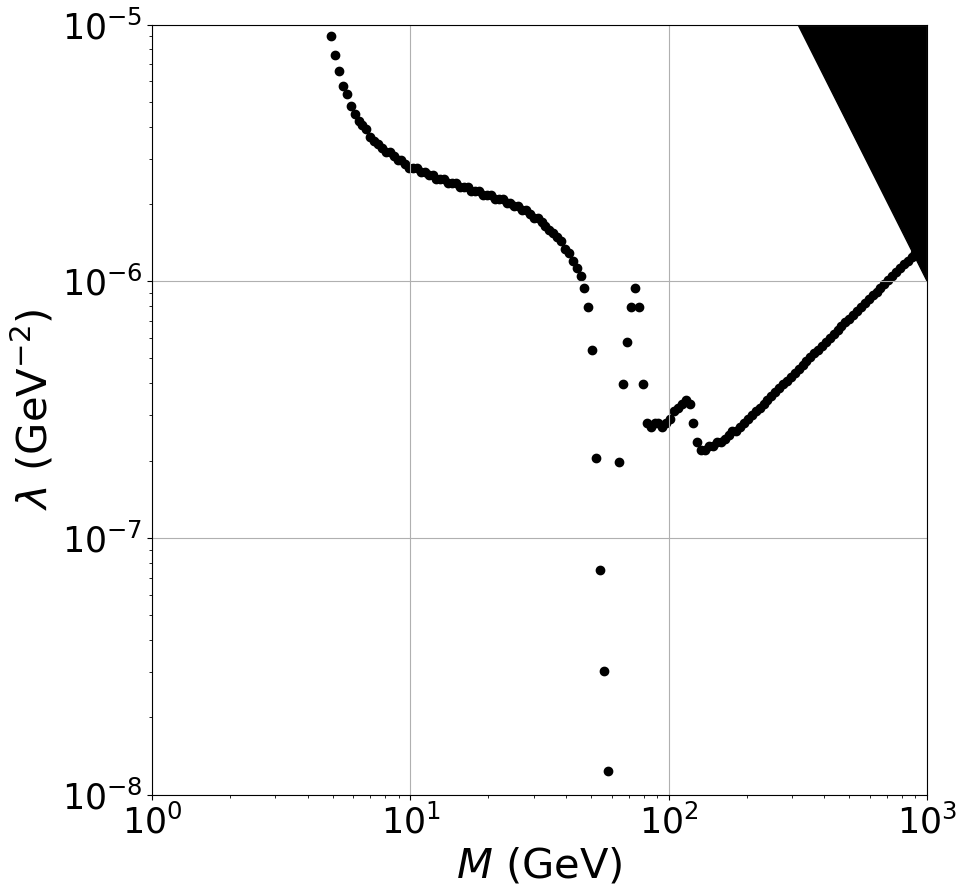

In [3]:
# Generando grafica de los resultados
plt.figure(figsize=(10,10))

plt.scatter(line[:,0],line[:,1], color = 'black')

plt.xscale('log')
plt.yscale('log')

plt.xticks(size=25)
plt.yticks(size=25)

plt.xlabel(r"$M$ (GeV)", size=30)
plt.ylabel(r"$\lambda$ (GeV$^{-2}$)", size=30)

linecutX = np.arange(1,1000,1)
linecutY = 1/linecutX**2
plt.fill_between(linecutX,linecutY, np.max(linecutY), color='black')

plt.xlim(1,1000)
plt.ylim(1e-8,1e-5)

plt.grid()
plt.savefig("relicdensity.eps", bbox_inches='tight')
plt.show()